In [1]:
import os
import numpy as np
import pandas as pd
labels = os.listdir('C:/Users/rahul/OneDrive/Desktop/project/dataset/')
print(labels)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']



 A


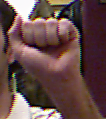

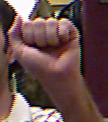

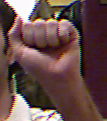

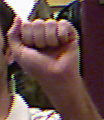

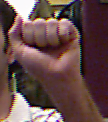

there are  1055  images in  a class

 B


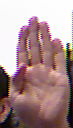

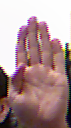

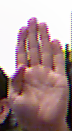

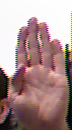

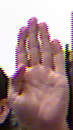

there are  1031  images in  b class

 C


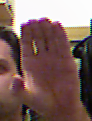

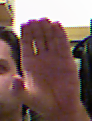

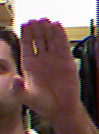

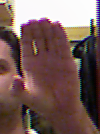

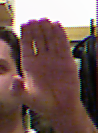

there are  1113  images in  c class

 D


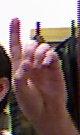

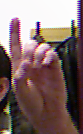

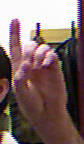

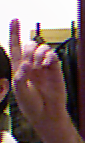

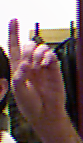

there are  1071  images in  d class

 E


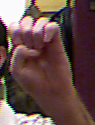

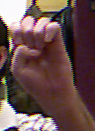

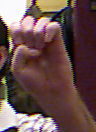

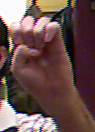

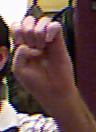

there are  1047  images in  e class

 F


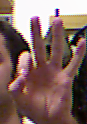

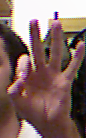

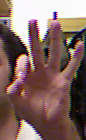

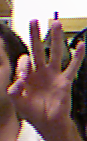

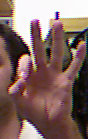

there are  1037  images in  f class

 G


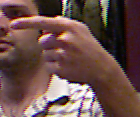

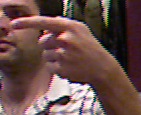

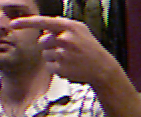

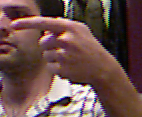

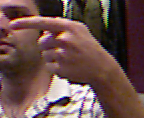

there are  1055  images in  g class

 H


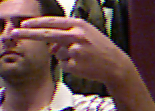

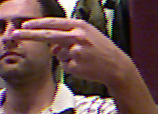

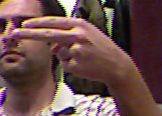

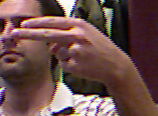

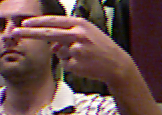

there are  1045  images in  h class

 I


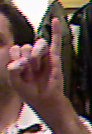

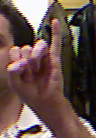

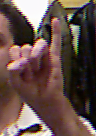

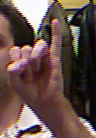

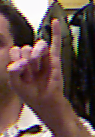

there are  1029  images in  i class

 K


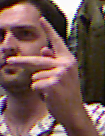

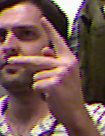

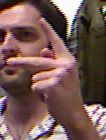

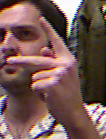

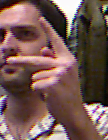

there are  1035  images in  k class

 L


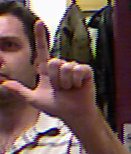

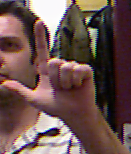

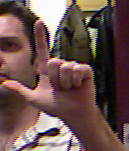

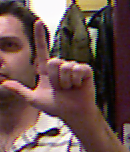

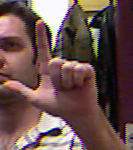

there are  1031  images in  l class

 M


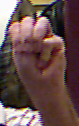

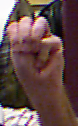

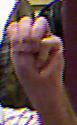

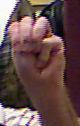

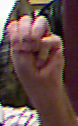

there are  1053  images in  m class

 N


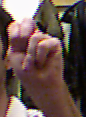

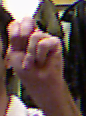

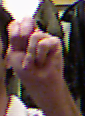

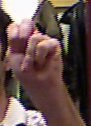

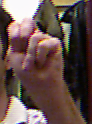

there are  1059  images in  n class

 O


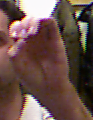

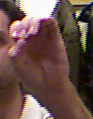

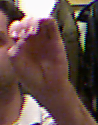

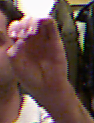

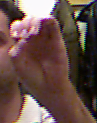

there are  1023  images in  o class

 P


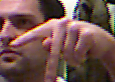

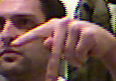

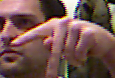

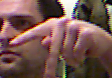

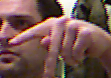

there are  1143  images in  p class

 Q


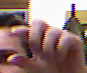

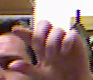

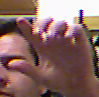

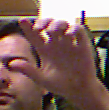

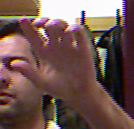

there are  1031  images in  q class

 R


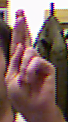

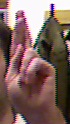

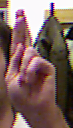

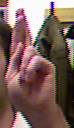

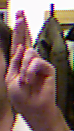

there are  1055  images in  r class

 S


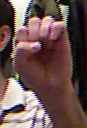

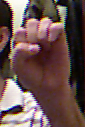

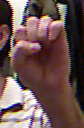

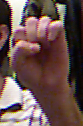

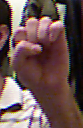

there are  941  images in  s class

 T


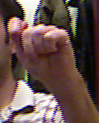

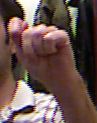

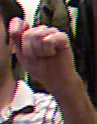

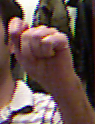

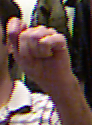

there are  1047  images in  t class

 U


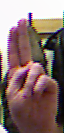

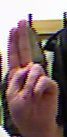

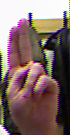

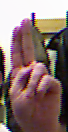

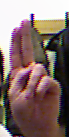

there are  1047  images in  u class

 V


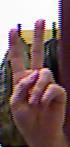

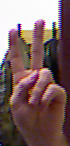

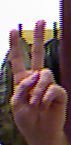

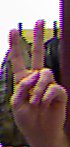

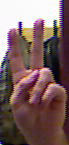

there are  1013  images in  v class

 W


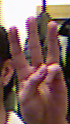

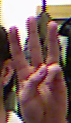

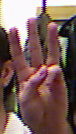

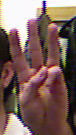

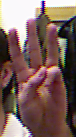

there are  1049  images in  w class

 X


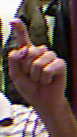

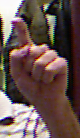

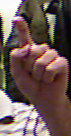

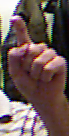

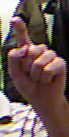

there are  1043  images in  x class

 Y


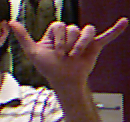

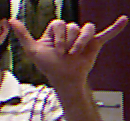

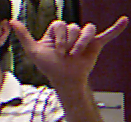

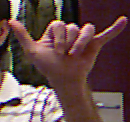

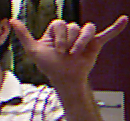

there are  1065  images in  y class


In [2]:
#how many images in each folder and which label belong to which alphabet
from IPython.display import Image, display
num = []
for label in labels:
    path = 'C:/Users/rahul/OneDrive/Desktop/project/dataset/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

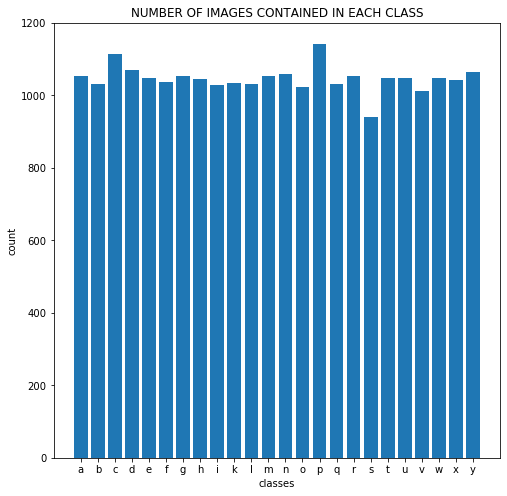

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()


In [5]:
#image processing converting images in arrays
x_data =[]
y_data = []
import cv2
for label in labels:
    path = 'C:/Users/rahul/OneDrive/Desktop/project/dataset/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [7]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (25118, 32, 32, 3) and that of Y is:  (25118,)


In [8]:
x_data

array([[[[ 45,  58,  68],
         [ 39,  29,  69],
         [193, 192, 223],
         ...,
         [ 32,  27,  44],
         [ 27,  40,  61],
         [ 33,  55,  63]],

        [[ 39,  40,  45],
         [ 49,  33,  55],
         [ 59,  10,  55],
         ...,
         [ 41,  20,  51],
         [ 32,  19,  46],
         [ 22,  17,  45]],

        [[ 31,  28,  35],
         [ 35,  30,  43],
         [ 51,  36,  55],
         ...,
         [ 26,  21,  56],
         [ 21,  18,  53],
         [ 24,  17,  49]],

        ...,

        [[ 82,  93, 131],
         [ 87,  95, 135],
         [ 87,  95, 122],
         ...,
         [ 56,  76,  98],
         [ 50,  32,  67],
         [ 46,  26,  62]],

        [[ 77, 100, 141],
         [ 97, 106, 146],
         [ 53,  73, 144],
         ...,
         [ 75,  84, 109],
         [ 61,  52,  76],
         [ 46,  21,  59]],

        [[ 99, 119, 161],
         [ 98, 115, 156],
         [133, 160, 199],
         ...,
         [ 59,  74, 107],
        

In [9]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [10]:
x_data

array([[[[0.1764706 , 0.22745098, 0.26666668],
         [0.15294118, 0.11372549, 0.27058825],
         [0.75686276, 0.7529412 , 0.8745098 ],
         ...,
         [0.1254902 , 0.10588235, 0.17254902],
         [0.10588235, 0.15686275, 0.23921569],
         [0.12941177, 0.21568628, 0.24705882]],

        [[0.15294118, 0.15686275, 0.1764706 ],
         [0.19215687, 0.12941177, 0.21568628],
         [0.23137255, 0.03921569, 0.21568628],
         ...,
         [0.16078432, 0.07843138, 0.2       ],
         [0.1254902 , 0.07450981, 0.18039216],
         [0.08627451, 0.06666667, 0.1764706 ]],

        [[0.12156863, 0.10980392, 0.13725491],
         [0.13725491, 0.11764706, 0.16862746],
         [0.2       , 0.14117648, 0.21568628],
         ...,
         [0.10196079, 0.08235294, 0.21960784],
         [0.08235294, 0.07058824, 0.20784314],
         [0.09411765, 0.06666667, 0.19215687]],

        ...,

        [[0.32156864, 0.3647059 , 0.5137255 ],
         [0.34117648, 0.37254903, 0.5294118 ]

In [11]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [12]:
y_encoded

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int64)

In [14]:
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

Using TensorFlow backend.


In [15]:
y_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [17]:
q = [1,2,3,4,5]
q

[1, 2, 3, 4, 5]

In [20]:
np.random.shuffle(q)
q

[1, 3, 2, 4, 5]

In [21]:
len(X),len(Y)

(25118, 25118)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [26]:

# Initialing the CNN
#from tensorflow_core.python.keras.api.keras import optimizers
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation

#Kernel = zeros --> No change in weights... like vanishing gradient problem
#kernel = random --> Performs better but when you rerun the experiment the results may vary quite a bit, depends on the application. 
#kernel = he_uniform --> Ideal to work with relu. 
#kernel = glorot_uniform --> similar to he_uniform but different variance. he_uniform is preferred with ReLu

classifier =  Sequential()

# Step 1 - Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", input_shape=(32, 32, 3), activation='relu'))

# step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding second convolution layer
classifier.add(Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Adding 3rd Convolution Layer
classifier.add(Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))
classifier.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=24, activation='softmax'))

# Compiling The CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [27]:
#fitting the model
history = classifier.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Train on 13463 samples, validate on 3366 samples
Epoch 1/10
13463/13463 [==============================] - 44s 3ms/step - loss: 2.1770 - accuracy: 0.3426 - val_loss: 1.2678 - val_accuracy: 0.7600
Epoch 2/10
13463/13463 [==============================] - 42s 3ms/step - loss: 0.8865 - accuracy: 0.7243 - val_loss: 0.6371 - val_accuracy: 0.8705
Epoch 3/10
13463/13463 [==============================] - 42s 3ms/step - loss: 0.5755 - accuracy: 0.8156 - val_loss: 0.4491 - val_accuracy: 0.9177
Epoch 4/10
13463/13463 [==============================] - 42s 3ms/step - loss: 0.4129 - accuracy: 0.8641 - val_loss: 0.2830 - val_accuracy: 0.9340
Epoch 5/10
13463/13463 [==============================] - 42s 3ms/step - loss: 0.3283 - accuracy: 0.8915 - val_loss: 0.2427 - val_accuracy: 0.9468
Epoch 6/10
13463/13463 [==============================] - 43s 3ms/step - loss: 0.2672 - accuracy: 0.9118 - val_loss: 0.1897 - val_accuracy: 0.9563
Epoch 7/10
13463/13463 [==============================] - 45s 3ms/ste

In [28]:
# Saving the model
classifier.save('my_model2.h5')

#print(classifier.history.keys())

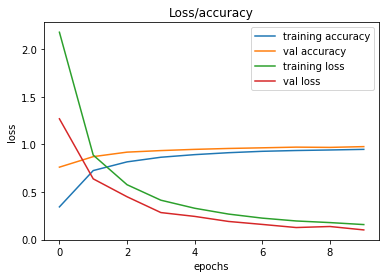

In [29]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
Y_pred = classifier.predict_classes(X_test)
Y_pred

array([ 7, 12, 21, ..., 13, 22, 21], dtype=int64)

In [31]:
Y_test = np.argmax(Y_test, axis = 1)

In [23]:
Y_test

array([ 9,  0,  7, ..., 14,  0, 11], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.9763542043672336


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       354
           1       0.99      0.99      0.99       342
           2       0.99      1.00      0.99       367
           3       0.99      0.98      0.99       347
           4       0.96      0.94      0.95       335
           5       0.99      1.00      0.99       338
           6       0.91      0.96      0.93       350
           7       0.95      0.91      0.93       348
           8       1.00      0.99      1.00       349
           9       0.95      0.99      0.97       343
          10       0.98      1.00      0.99       358
          11       0.98      0.99      0.98       322
          12       0.99      0.97      0.98       360
          13       0.93      0.96      0.95       331
          14       0.98      0.99      0.98       380
          15       0.99      0.97      0.98       353
          16       0.98      0.95      0.96       346
          17       0.99    

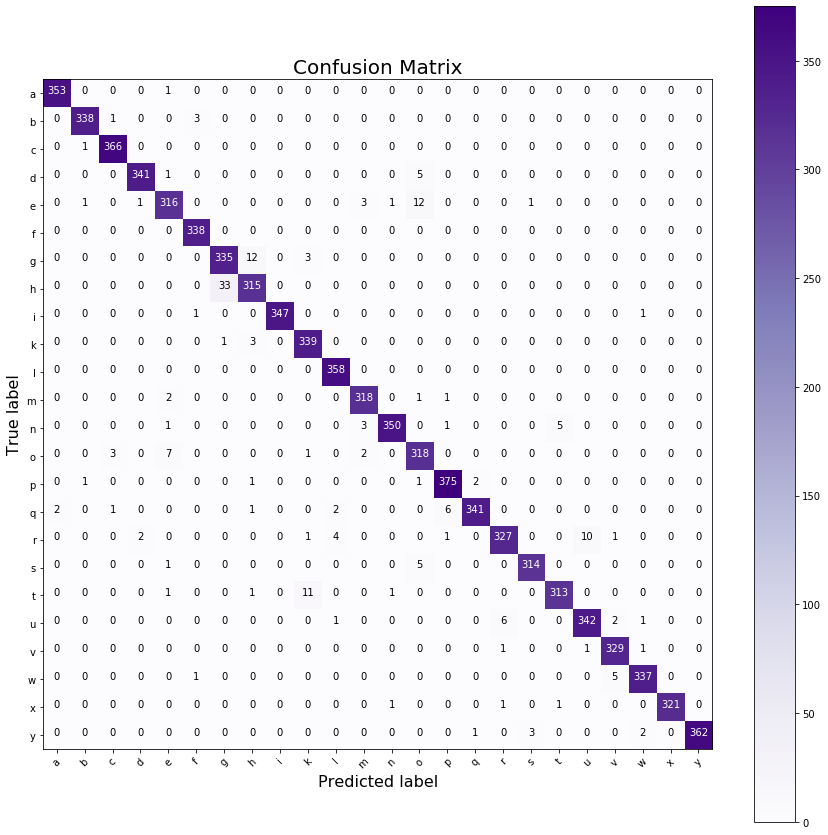

In [34]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = classifier.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(Y_test, Y_pred)

Y


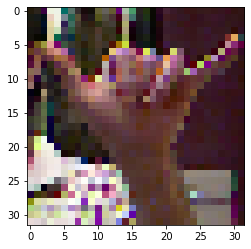

In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\rahul\OneDrive\Desktop\project\dataset\y\color_24_0004.png',target_size=(32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'K'
elif result[0][10] == 1:
    prediction = 'L'
elif result[0][11] == 1:
    prediction = 'M'
elif result[0][12] == 1:
    prediction = 'N'
elif result[0][13] == 1:
    prediction = 'O'
elif result[0][14] == 1:
    prediction = 'P'
elif result[0][15] == 1:
    prediction = 'Q'
elif result[0][16] == 1:
    prediction = 'R'
elif result[0][17] == 1:
    prediction = 'S'
elif result[0][18] == 1:
    prediction = 'T'
elif result[0][19] == 1:
    prediction = 'U'
elif result[0][20] == 1:
    prediction = 'V'
elif result[0][21] == 1:
    prediction = 'W'
elif result[0][22] == 1:
    prediction = 'X'
elif result[0][23] == 1:
    prediction = 'Y'
else:
    prediction = 'invalid'
    
print(prediction)

In [43]:
import keras
from keras.applications.vgg19 import VGG19

img_height = 32
img_width = 32
img_channels = 3
#weights = 'C:/Users/rahul/OneDrive/Desktop/project/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

def build_model():
    base = VGG19(include_top = False, weights='imagenet', input_shape = (img_height, img_width, img_channels))
    X = base.output
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(24, activation = 'softmax')(X)
    
    model = keras.models.Model(inputs = base.input, outputs = preds)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [44]:
model = build_model()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [87]:
history_vgg = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)

Train on 13463 samples, validate on 3366 samples
Epoch 1/5
13463/13463 [==============================] - 2153s 160ms/step - loss: 3.2104 - accuracy: 0.1478 - val_loss: 2.0385 - val_accuracy: 0.4296
Epoch 2/5
13463/13463 [==============================] - 2122s 158ms/step - loss: 2.2240 - accuracy: 0.3600 - val_loss: 1.4295 - val_accuracy: 0.5995
Epoch 3/5
13463/13463 [==============================] - 2102s 156ms/step - loss: 1.5538 - accuracy: 0.5455 - val_loss: 1.0849 - val_accuracy: 0.6940
Epoch 4/5
13463/13463 [==============================] - 2470s 183ms/step - loss: 1.1204 - accuracy: 0.6772 - val_loss: 0.6014 - val_accuracy: 0.8437
Epoch 5/5
13463/13463 [==============================] - 3217s 239ms/step - loss: 0.8072 - accuracy: 0.7734 - val_loss: 0.5069 - val_accuracy: 0.8500


In [88]:
# Saving the model
model.save('my_model_vgg.h5')

#print(classifier.history.keys())

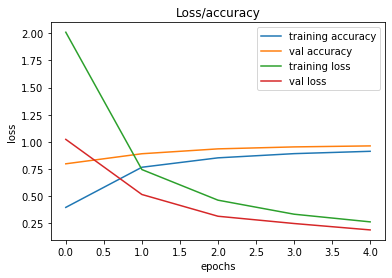

In [89]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [90]:
Y_pred_vgg = model.predict(X_test)

In [91]:
Y_pred_vgg = np.argmax(Y_pred_vgg ,  axis=1)

In [92]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred_vgg,Y_test))

the accuracy obtained on the test set is: 0.8419592230667149


In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_vgg))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       361
           1       0.75      0.99      0.86       336
           2       0.65      0.95      0.77       329
           3       0.98      0.87      0.92       342
           4       0.92      0.70      0.79       353
           5       0.92      0.99      0.95       351
           6       0.73      0.77      0.75       348
           7       0.91      0.62      0.74       341
           8       0.90      0.96      0.93       358
           9       0.97      0.84      0.90       343
          10       1.00      0.94      0.97       340
          11       0.89      0.96      0.93       344
          12       0.94      0.55      0.69       373
          13       0.86      0.54      0.67       320
          14       0.83      0.93      0.88       380
          15       0.63      0.89      0.74       356
          16       0.93      0.66      0.77       363
          17       0.84    

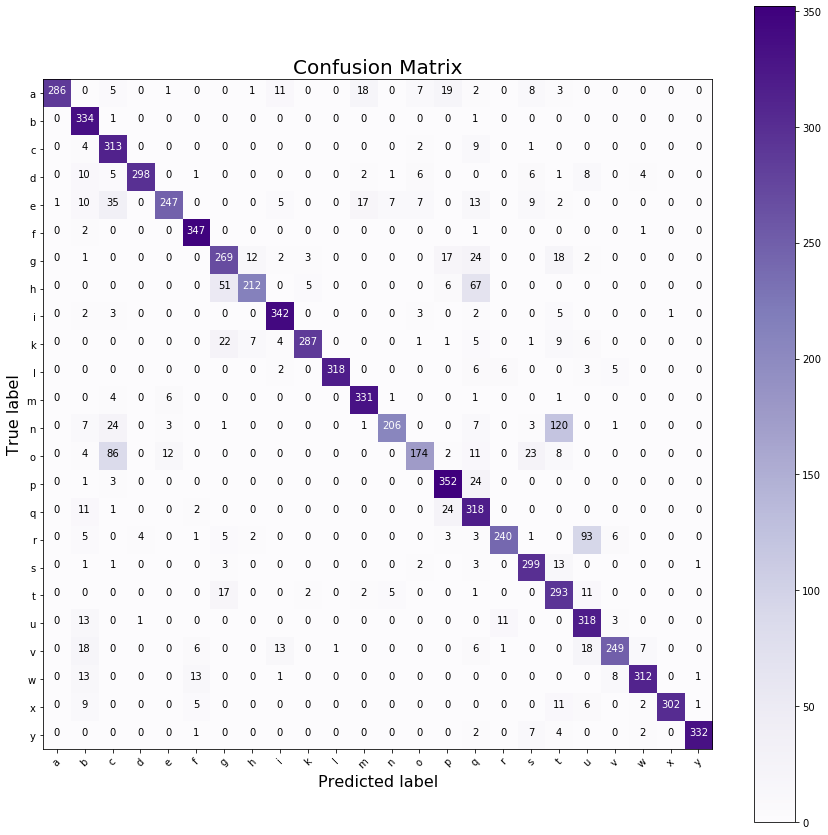

In [98]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(Y_test, Y_pred_vgg)

B


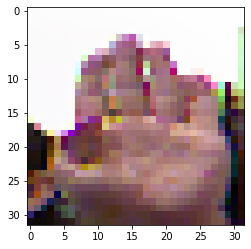

In [40]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\rahul\OneDrive\Desktop\project\dataset\b\color_1_0006.png',target_size=(32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'A'
elif result[0][1] == 1:
    prediction = 'B'
elif result[0][2] == 1:
    prediction = 'C'
elif result[0][3] == 1:
    prediction = 'D'
elif result[0][4] == 1:
    prediction = 'E'
elif result[0][5] == 1:
    prediction = 'F'
elif result[0][6] == 1:
    prediction = 'G'
elif result[0][7] == 1:
    prediction = 'H'
elif result[0][8] == 1:
    prediction = 'I'
elif result[0][9] == 1:
    prediction = 'K'
elif result[0][10] == 1:
    prediction = 'L'
elif result[0][11] == 1:
    prediction = 'M'
elif result[0][12] == 1:
    prediction = 'N'
elif result[0][13] == 1:
    prediction = 'O'
elif result[0][14] == 1:
    prediction = 'P'
elif result[0][15] == 1:
    prediction = 'Q'
elif result[0][16] == 1:
    prediction = 'R'
elif result[0][17] == 1:
    prediction = 'S'
elif result[0][18] == 1:
    prediction = 'T'
elif result[0][19] == 1:
    prediction = 'U'
elif result[0][20] == 1:
    prediction = 'V'
elif result[0][21] == 1:
    prediction = 'W'
elif result[0][22] == 1:
    prediction = 'X'
elif result[0][23] == 1:
    prediction = 'Y'
else:
    prediction = 'invalid'
    
print(prediction)